# Modèle SIR, Analyse de sensibilité

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.integrate import odeint
from gekko import GEKKO
import warnings
m = GEKKO()

## Description

Ce mini-projet du cours d’incertitudes comporte deux parties qui sont in-
dépendantes. Le rapport est inclut dans ce note book en commentant et observant les résultats à fur et à mesure.

Les références sont indiqués en bas du notebook.

## Introduction

La modélisation d’une épidémie a fait l’objet d’une attention médiatique
particulière depuis le mois de mars 2020. Plusieurs modèles sont généralement
utilisés à cette fin.Le modéle choisis pour cette analyse de sensibilité est semblable à celui donné par Corentin Bayette et référencié dans l'enoncé [3]. J'ai rajouté des paramètres tenues en compte dans ce dérnier dans le modéle que j'ai utilisé, qui est décrit dans [2].

## Modèlisation mathématique

Le but du modéle est de réussir à déterminer une stratégie optimale de mise en place de mesures de
restriction sur une population afin de lutter contre la propagation d’une épidémie. La question
que l’on souhaite résoudre s’énonce ainsi :

**Comment optimiser l’action des pouvoirs publics pour limiter le nombre de personnes infectées ?**

Nous allons considérer le modèle SIR (Susceptible-Infected-Removed) simplifié décrit dans [2] :

$$\left\{\begin{array}{ll} 
      S'(t) =-u(t) \frac{S(t)I(t)}{N(t)} \quad t \geq 0 \\
      I'(t) =u(t) \frac{S(t)I(t)}{N(t)}  - \beta I(t), \quad  \quad \quad (1) \\
      R'(t) =\beta I(t), \\
      (S(0), I(0), R(0)) = (S_0,  I_0, R_0).
      \end{array}
    \right.$$

Dans ce modèle $S(t)$ représente le nombre de personnes saines au temps t, $I(t)$ le nombre de
personnes infectées, et R(t) le nombre de personnes retirées (guéries ou décédées). La fonction
$u(·)$ représente un contrôle modélisant une politique de restriction, typiquement un confinement.
Il s’agit d’une fonction de $L^{\infty}(R^+)$ à valeurs dans $[0, \alpha]$. 
* Le cas $u(·) = 0$ modélise un confinement total 
* tandis que $u(·) = \alpha$ modélise l’absence de confinement. 
* Le nombre réel positif $\alpha$ représente le taux d’infection de la maladie. 
* Enfin, le nombre positif $\beta$ est le taux d’élimination.

La quantité $N = S(t) + I(t) + R(t)$ représente alors la population constante totale au cours du
temps. Il convient de bien différencier les personnes saines des personnes retirées : les personnes
saines n’ont pas encore été touchées par le virus, alors que les personnes retirées sont guéries,
et donc immunisées ou décédées. Autrement dit, les personnes retirées ne sont plus prises en
compte. Par conséquent, Ce modèle SIR ne s’occupe pas directement de prédire la mortalité de
l’épidémie [2].


## Estimation des paramètres:

Dans cette partie, nous allons déterminer les paramètres du modèle.
le modèle est représenté par le système:
$$\left\{\begin{array}{ll} 
      S'(t) =-u(t) \frac{S(t)I(t)}{N(t)} \quad t \geq 0 \\
      I'(t) =u(t) \frac{S(t)I(t)}{N(t)}  - \beta I(t), \quad  \quad \quad (1) \\
      R'(t) =\beta I(t), \\
      (S(0), I(0), R(0)) = (S_0,  I_0, R_0).
      \end{array}
    \right.$$

On a donc les paramètres suivant:

* $\alpha$  Le nombre réel positif qui représente le taux d’infection de la maladie. 
* $\beta$ Le nombre positif qui est le taux d’élimination.
* $S_0$ Représente le nombre de personnes saines au temps 0.
* $I_0$ Représente le nombre de personnes infectées au temps 0.
* $R_0$ Le taux de reproduction du virus.
* $N$ le nombre totale de la population.


Maintenant il faut considérer des distributions pour les paramètre que l'on va considérer comme variables aléatoires ou des constantes pour le cas échéant.
$$
\begin{array}{|l|c|c|c|c|c|}
\hline
\text{$\alpha$} & \beta & S_0 & I_0& R_0 & N \\
\hline
Va & Va & Va & Va & Va & cst \\
\hline
\end{array}
$$

En effet:


**Pour N:**

Pour vérifier que $N(.)$, le nombre totale de la population, est constant on calcule $N'(.)$ à partir du systéme en dessus.

$$
N'(t) = S'(t) + I'(t) + R'(t) =
{-u(t) \frac{S(t)I(t)}{N(t)}} 
+ {u(t) \frac{S(t)I(t)}{N(t)}}  - {\beta I(t)}
+{\beta I(t)} = 0 \quad \quad \forall t \geq 0
$$

On en déduit que $N(.)$ est bien constante. On est en France donc on prend la population de la France en particulier e.g: $$N = 6.7e7$$

**Pour $\alpha$ et $\beta$:**

Dans ce qui suit, nous allons nous baser sur la situation de l’épidémie en France en avril 2020.
Les auteurs de [1] estiment les paramètres $\alpha \simeq 0.32$ et $\beta = \frac {1}{10}$. 

On considère les distibutions de loi Normal : 

| Variable | Distribution |
|--|--|
| $\alpha$ | Normal($\mu_a, \sigma_a$) |
| $\beta$ | Normal($\mu_b, \sigma_b$)  |

On fait l'hypothèse que les variables $\alpha$ et $\beta$ sont indépendantes. 

Les paramètres des distributions de $\alpha$ et $\beta$ sont :

$$
\mu_a = 0.32, \qquad \sigma_a = ? (0.1) .
$$
et
$$
\mu_b = \frac {1}{10}, \qquad \sigma_b = ? (0.002) .
$$

Les moyennes sont données par [1] mais l'écart type est donné aléatoirement car je n'ai pas trouvé une base de donné pour l'estimer en aplliquant la loi des grands nombres avec la relation:
$$ \sigma = \sqrt{\frac{\sum_0^{n_{data}}\mid x_i-\mu \mid}{n_{data}}}$$

**Pour $S_0$:**

On a $N = S(t) + I(t) + R(t)$

Donc $S_0 = N - I_0 - R_0$

**Pour $I_0$:**
C'est le nombre de personnes infectées donc il varie uniformément entre 0 et la population totale de la France.
On considère donc la distribution:


| Variable | Distribution |
|--|--|
| $I_0$ |Uniform(min=0, max= N=6.7e7 |


**Pour $R_0$:**

Rappelons selon [2] que pour ce modèle le taux de reproduction du virus est défini par: $$R_0 = \frac {\alpha} {\beta}$$.



## Sensibilité (methodologie):

Les variables aléatoire clé de notre modèle est donc:

| Variable | Distribution |
|--|--|
| $\alpha$ | Normal($\mu_a, \sigma_a$) |
| $\beta$ | Normal($\mu_b, \sigma_b$)  |
| $I_0$ |Uniform(min=0, max= N=6.7e7 |
                 
On en déduit les autres avec les relation =

* N = 6.7e-7
* $R_0 = \frac {\alpha} {\beta}$
* $S_0 = N - R_0 - I_0$ 

Et on résoud:

$$\left\{\begin{array}{ll} 
      S'(t) =-u(t) \frac{S(t)I(t)}{N(t)} \quad t \geq 0 \\
      I'(t) =u(t) \frac{S(t)I(t)}{N(t)}  - \beta I(t), \quad  \quad \quad (1) \\
      R'(t) =\beta I(t), \\
      (S(0), I(0), R(0)) = (S_0,  I_0, R_0).
      \end{array}
    \right.$$
    
    
Pour avoir des variables aléatoire de sortie S,R et I et effectuer l'analyse de sensibilité par:
$$ ot.SobolIndicesAlgorithm.DrawCorrelationCoefficients()$$

In [1]:
import openturns as ot
import numpy as np

In [28]:
dist_alpha= ot.Normal(0.32, 0.1)
dist_alpha.setDescription(["alpha"])
dist_beta= ot.Normal(0.1, 0.002)
dist_beta.setDescription(["beta"])

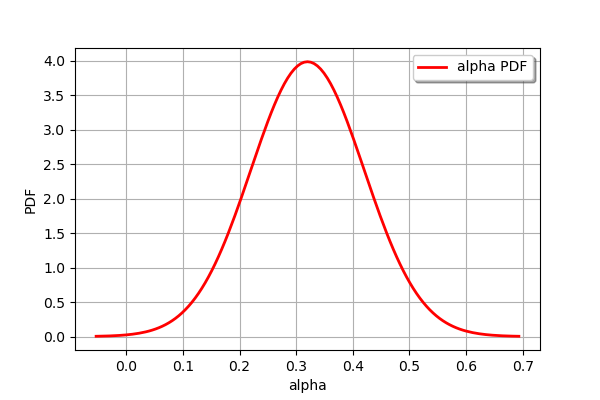

In [29]:
dist_alpha.drawPDF()

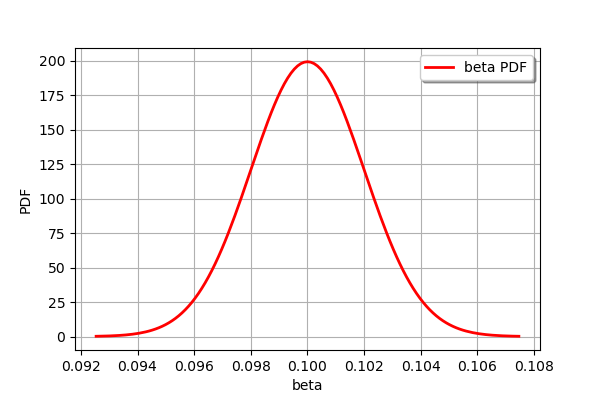

In [30]:
dist_beta.drawPDF() 

## Implémentation:
**En se basant sur la matière Contôle optimal enseigné par Mr. Yannck privat [4].**

## Cas de contrôles constants

**Dans chacun des deux cas suivants, représenter les solutions
S, I et R du système sur [0, T] :  $u(·) = α$ (pas de confinement), $u(·) = ε$ (avec $ε > 0$ proche de 0, confinement fort)**

On rappelle que pour résoudre l’EDO $x' = F(t, x)$, la méthode de Runge-Kutta d’ordre 4 consiste à utiliser
le schéma:
$x_{n+1} = x_n +\frac {h_n} 6(k_1 + 2k_2 + 2k_3 + k_4)$  avec:

$$\left\{\begin{array}{ll} 
      k_1 = F(t_n, x_n) \\
      k_2 = F(t_n + \frac {h_n} 2, x_n + h_n \frac {k_1} 2) \\
      k_3 = F(t_n + \frac {h_n} 2, x_n + h_n \frac {k_2} 2), \\
      k_4 = F(t_n + h_n, x_n + h_n k_3)).
      \end{array}
    \right.$$





**Et F: (t,x)->x' est implémenté ci-dessous:**

In [2]:
def F(i,x,u,beta=0.1,N=6.7e7):
    assert len(x)==3,"Dimension de x=[S,I,R] incorrecte!"
    return np.array([-u[int(i)]*x[0]*x[1]/N, u[int(i)]*x[0]*x[1]/N - beta*x[1],beta*x[1]])
    

In [6]:
def runge_kutta_4(F,t, x0,u,beta):

    dim_t = len(t) # temps
    dim_x = len(x0) # S,I et R (3)
    X = np.zeros((dim_t, dim_x))
    h_vec = t[1:] - t[:-1]#dans le cas ou h variable
    #N = x0[0]+x0[1]+x0[2]
    
    # initialisation
    X[0,:] = x0
    N= x0.sum()

    for i in range(0, dim_t-1):
        
        h = h_vec[i]#pas
        N = X[i,0]+X[i,1]+X[i,2]#vérifier que n est constante

        k1 = F(i, X[i,:],u=u,beta=0.1,N=N)
        k2 = F(i + h/2, 0.5*(X[i,:]+X[i-1,:]) + h*k1/2,u=u,beta=0.1,N=N)
        k3 = F(i + h/2, 0.5*(X[i-1,:]+X[i-1,:])  + h*k2/2,u=u,beta=0.1,N=N)
        k4 = F(i + h, X[i,:] + h*k3,u=u,beta=0.1,N=N)
        X[i+1,:] = X[i,:] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        

    return X

In [7]:
def test_rungekutta_4(F,t,x0,u,beta=0.1,plot=True):
    with warnings.catch_warnings():
        warnings.filterwarnings('error')
        #np.seterr('raise')
        try:
            Sol = runge_kutta_4(F,t, x0,u,beta)
            if plot:
                print("-----------------------------------------------------------------------------------")
                print("Au bout T = ",T," jours (u=",u[-1],") la variables d'état [S,I,R] = \n", Sol[-1])
                print("-----------------------------------------------------------------------------------")
                fig, ax = plt.subplots(figsize=(9,6))
                ax.set(xlabel='Temps(jours)', ylabel='S,I,R,U', \
                       title= "Trajectoire pour une valeur de contôle constante ="+str(u[-1]))
                ax.plot(t,Sol[:,0],label=r"S")
                ax.plot(t,Sol[:,1],label=r"I")
                ax.plot(t,Sol[:,2],label=r"R")
                ax.plot(t,Sol[:,0]+Sol[:,1]+Sol[:,2],label=r"N")
                ax.plot(t,u*np.ones(len(t)),label=r"u")
                ax.grid(True)
                ax.legend(loc='best',fontsize=15);
            return Sol
        except Warning as e:
            print('error found:', e)
    
    

**Cas où le contôle $u=\alpha = 0.32$**

-----------------------------------------------------------------------------------
Au bout T =  90  jours (u= 0.32 ) la variables d'état [S,I,R] = 
 [ 3269099.65870268   699436.86805894 63031463.47323837]
-----------------------------------------------------------------------------------


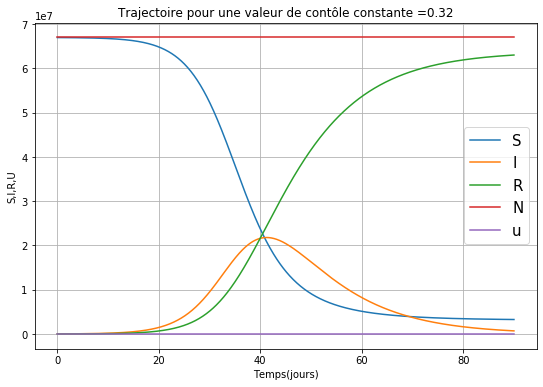

In [8]:
T=90
nb = 1000
t=np.linspace(0,T,nb)
x0 = np.array([6.7e7-2e4,2e4,0])#S0,I0,R0
u = 0.32*np.ones(nb)

Sol = test_rungekutta_4(F,t,x0,u,plot=True)

**Commentaire:**

Comme attendue, le nombre d'infectés I(T) diminue aprés avoir la valeurs maximal, ceci est expliqué du fait que les infectés sont immunisées en partie ($\beta$). En plus la population suscéptible S(T) diminue aussi, ce qui peux être un état d'absence de confinement.

**Cas où le contôle $u= \epsilon$ avec $\epsilon \sim 0$:**

-----------------------------------------------------------------------------------
Au bout T =  90  jours (u= 0.2 ) la variables d'état [S,I,R] = 
 [24972528.23806303  9010916.35241321 33016555.40952375]
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Au bout T =  90  jours (u= 0.15 ) la variables d'état [S,I,R] = 
 [62396314.32370964  1437585.93800459  3166099.73828582]
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
Au bout T =  90  jours (u= 0.1 ) la variables d'état [S,I,R] = 
 [6.68014866e+07 1.96936084e+04 1.78819840e+05]
-----------------------------------------------------------------------------------


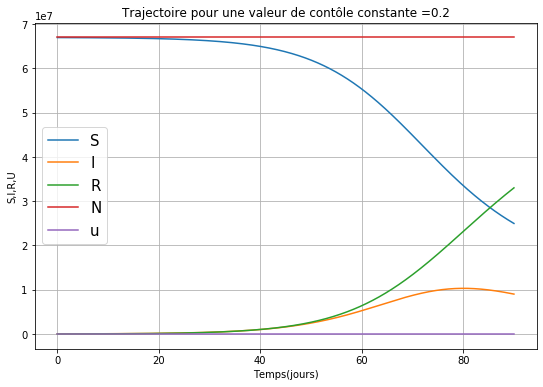

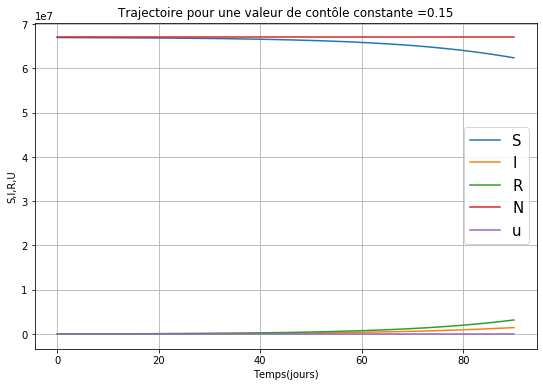

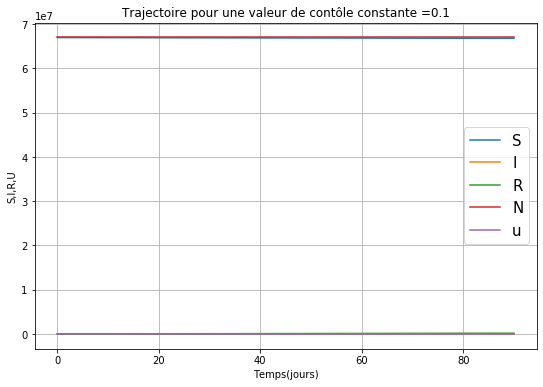

In [9]:
T=90
nb = 1000
t=np.linspace(0,T,nb)
x0 = np.array([6.7e7-2e4,2e4,0])#S0,I0,R0

U = [0.2,0.15,0.1]
for u in U:
    u = u*np.ones(nb)

    Sol = test_rungekutta_4(F,t,x0,u,plot=True)

**Commentaire:**

Le nombre d'infectés I(T) est en hausse et visiblement loin de son maximum, alors que la population susceptible est trés grande ce qui engendre un confinement total.

## Conclusion:

Je n'ai pas eu le temps pour rèècrire la résolution en Openturn puis calculer les sortie I, R, S. Ensuite estimer les indices de Sobol pour faire une étude de sensibilité et en déduire les plus sensibles.

# Références:

$[1] \quad$  Santé Publique France (2020). COVID-19.

$[2]  \quad$ Lionel Roques, Etienne Klein, Julien Papaïx, Antoine Sar, and Samuel Soubeyrand, Using
early data to estimate the actual infection fatality ratiofrom COVID-19 in France, Biology
2020, 9, 97.

$[3]   \quad$ https://tinyurl.com/yysgyypg

$[3]   \quad$ https://irma.math.unistra.fr/~privat/cours/controleOpt.php